# Implement a simple deep neural network (DNN) for solving the polynomial equation $𝑦 = 5𝑥^3 − 10𝑥^2 − 20𝑥 + 10$ with the following specifications:

## Import Necessary Modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Activation
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras import metrics
import tensorflow as tf
from sklearn.metrics import mean_squared_error

## $𝑦 = 5𝑥^3 − 10𝑥^2 − 20𝑥 + 10$

In [ ]:
def calculate_y(x):
  return (5 * (x**3) - 10 * (x**2) - 20*x + 10)

## a) Use three hidden-layers of sizes 32, 64, and 128 to build the DNN model

In [ ]:
def dnn_model():
  input = Input((1,), name='InputLayer')
  hidden_layer1 = Dense(32, activation='relu')(input)
  hidden_layer2 = Dense(64, activation='relu')(hidden_layer1)
  hidden_layer3 = Dense(128, activation='relu')(hidden_layer2)
  output = Dense(1, name='OutputLayer')(hidden_layer3)

  model = Model(input, output, name="DNN_Model")
  return model

## a) Display the generated DNN model with the required number of parameters

In [ ]:
model = dnn_model()
model.summary()

Model: "DNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)              │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

## b) Generate training samples within the range of -20 to +20

In [ ]:
def generate_samples(n):
  x = np.random.uniform(-20, 20, n)
  y = calculate_y(x)

  return x, y

## b) Use an appropriate method for normalizing the training data in the range of -1 to +1

In [ ]:
def normalize(values):
  maximum = np.max(values)
  minimum = np.min(values)

  return (2 * (values - minimum) / (maximum - minimum)) - 1

## c) Use 5% of the samples as test data and 5% of the samples as validation data and the rest of the data for training the DNN with an appropriate number of epochs.

In [ ]:
n = 5000 # Number of samples
x, y = generate_samples(n)

# Normalization
x_norm = normalize(x)
y_norm = normalize(y)

# Train
x_train, y_train = x_norm[:int(n * 0.9)], y_norm[:int(n * 0.9)]

# Validation
x_val, y_val = x_norm[int(n * 0.9) : int(n * 0.95)], y_norm[int(n * 0.9) : int(n * 0.95)]

# Test
x_test, y_test = x_norm[int(n * 0.95):], y_norm[int(n * 0.95):]

## c) Training

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mean_squared_error', metrics=[metrics.R2Score(name='accuracy')])
fitted_model = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
history = fitted_model.history

Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7255 - loss: 0.0380 - val_accuracy: 0.9823 - val_loss: 0.0026
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9915 - loss: 0.0012 - val_accuracy: 0.9985 - val_loss: 2.2021e-04
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9988 - loss: 1.6934e-04 - val_accuracy: 0.9995 - val_loss: 7.7447e-05
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9996 - loss: 5.8470e-05 - val_accuracy: 0.9997 - val_loss: 4.4335e-05
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9997 - loss: 4.1602e-05 - val_accuracy: 0.9999 - val_loss: 1.4245e-05
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9998 - loss: 2.1471e-05 - val_accuracy: 0.9999 - val_loss: 9.9991e-06
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9999 - loss: 1.2230e-05 - val_accuracy: 1.0000 - val_loss: 6.4210e-06
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accura

## d) Display the training accuracy vs validation accuracy and training error vs validation error curves

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.8726e-06 
Test Loss: 6.791397026972845e-06
Test Accuracy: 0.9999555349349976
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


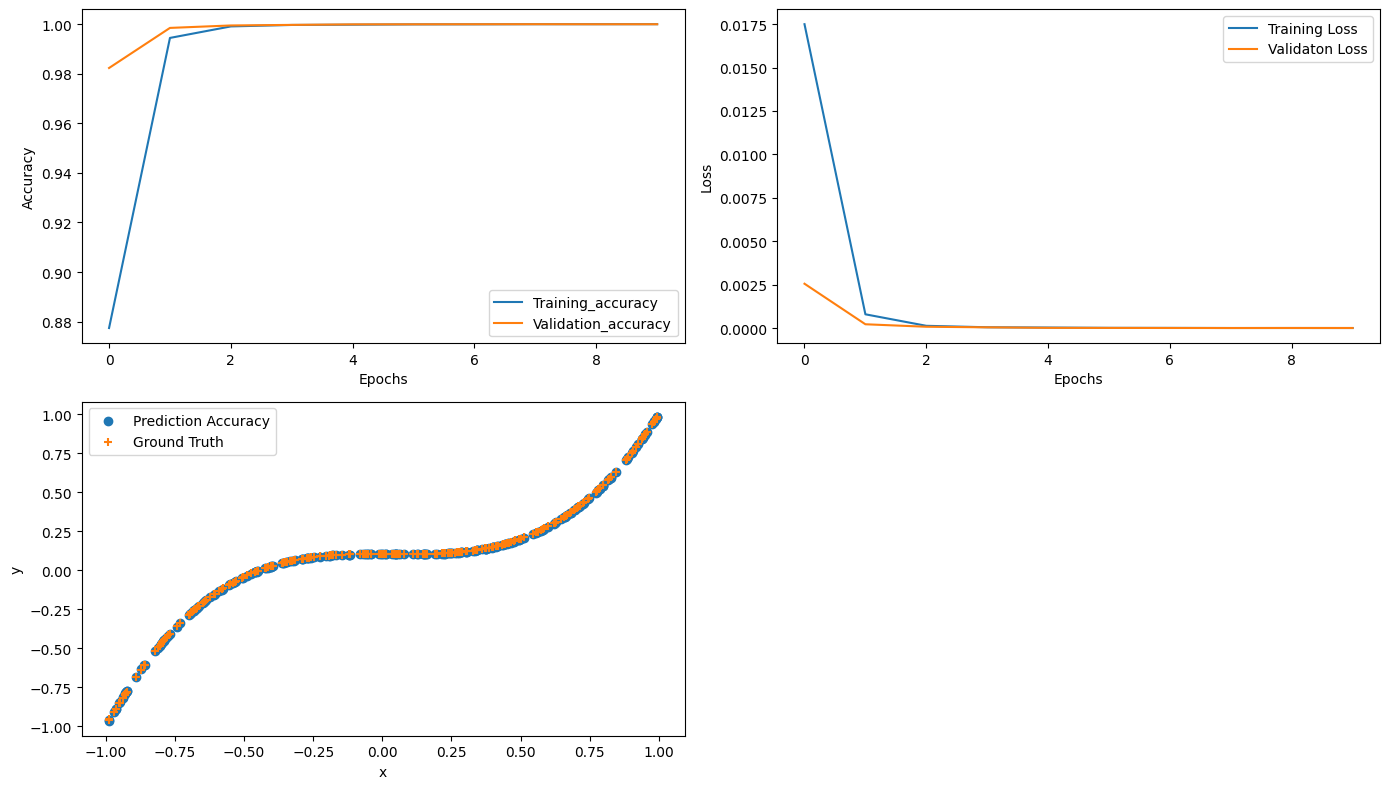

In [ ]:
plt.figure(figsize=(14,8))

# Plot Training and Validation Accuracy
plt.subplot(2,2,1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training_accuracy', 'Validation_accuracy'])

# Plot Training and Validation Loss
plt.subplot(2,2,2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validaton Loss'])

# Evaluate the Model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict on test data
predictions = model.predict(x_test)

# Plot prediction accuracy vs ground truth
plt.subplot(2,2,3)
plt.scatter(x_test,y_test, marker='o')
plt.scatter(x_test, predictions, marker='+')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(['Prediction Accuracy', 'Ground Truth'])

plt.tight_layout()
plt.show()